In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [22]:
filename = "StudentsPerformance.csv"
score_df = pd.read_csv(filename)
score_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
score_df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
score_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
score_df.dtypes

gender              object
ethnicity           object
parent_education    object
lunch               object
pre                 object
math                 int64
reading              int64
writing              int64
dtype: object

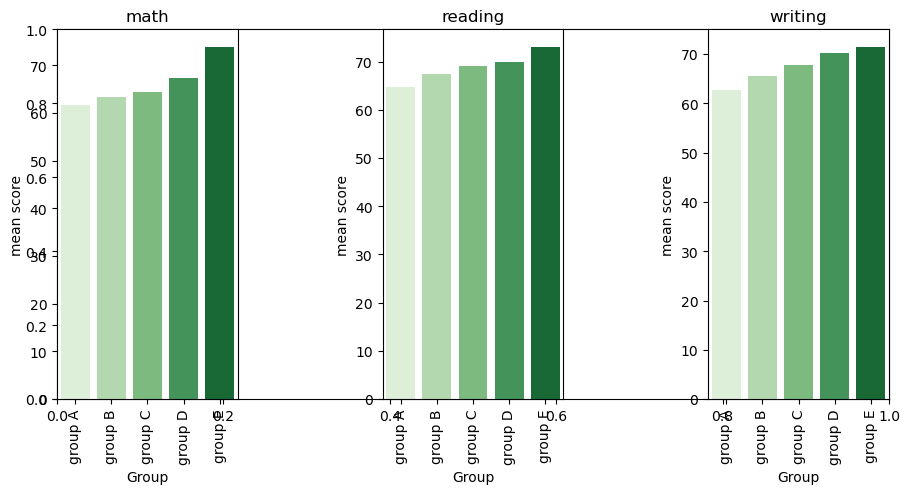

In [26]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = score_df.groupby("ethnicity")[list(score_df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Greens")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(score_df.columns[-3:])[idx])
plt.show()

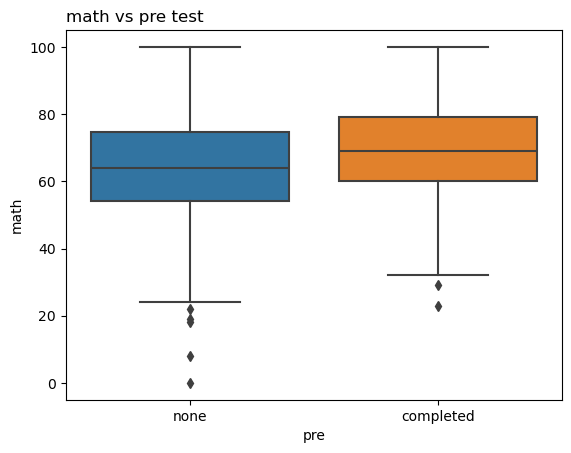

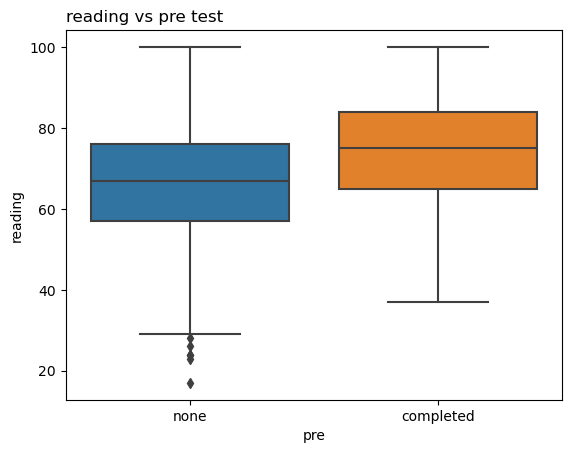

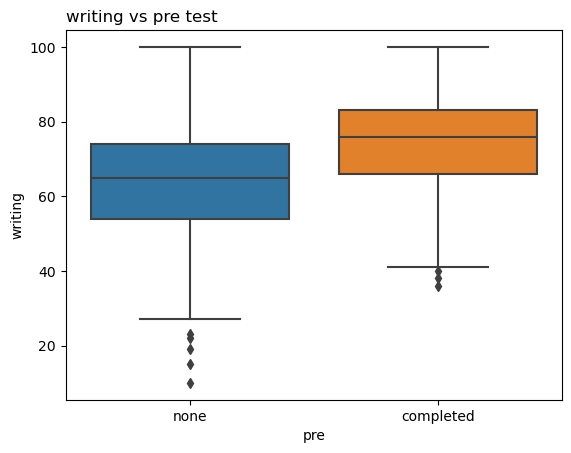

In [27]:
for item in score_df.columns[-3:]:
    sns.boxplot(x=score_df["pre"], y=score_df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

In [ ]:
#The score distribution got narrower if 
#students complete the preparation before test, and also we can see that the average of the score is better.

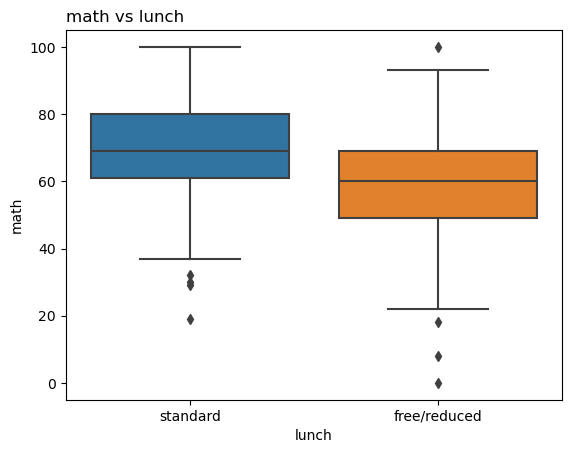

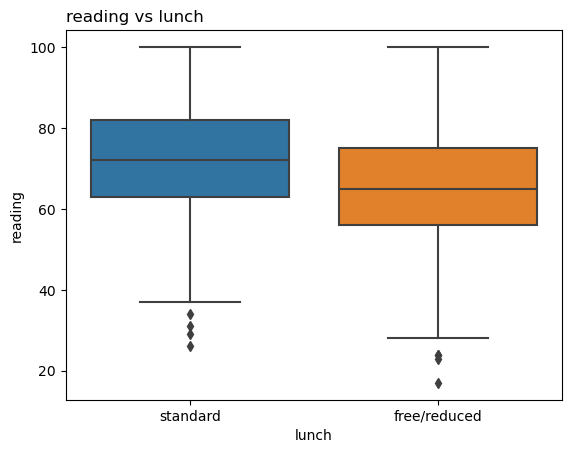

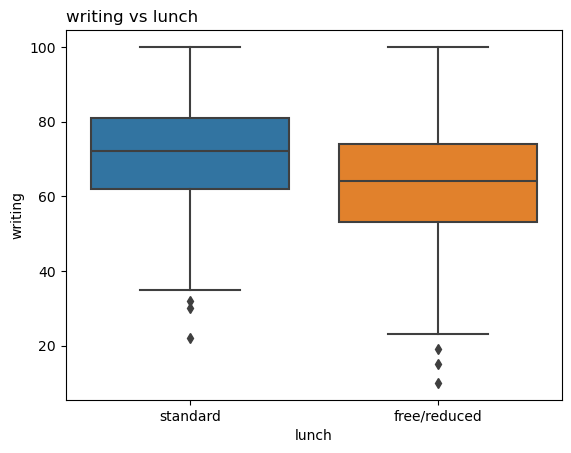

In [28]:
for item in score_df.columns[-3:]:
    sns.boxplot(x=score_df["lunch"], y=score_df[item])
    plt.title(item+" vs lunch", loc="left")
    plt.show()

In [ ]:
#Make sense! Students are easier to get better score once they eat standardly.

#I check the data type earily. Then I transform some features by label encoder.

In [29]:
labelencoder = LabelEncoder()
train_df = score_df.copy()
train_df["parent_education"] = labelencoder.fit_transform(train_df["parent_education"])
train_df["pre"] = labelencoder.fit_transform(train_df["pre"])
train_df["lunch"] = labelencoder.fit_transform(train_df["lunch"])
train_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,1,1,1,72,72,74
1,female,group C,4,1,0,69,90,88
2,female,group B,3,1,1,90,95,93
3,male,group A,0,0,1,47,57,44
4,male,group C,4,1,1,76,78,75


In [ ]:
#Great! The features "parent_education", 
#"lunch" and "pre" are labeled by numbers. Next, we use KMeans argorithm to classify the dataset.

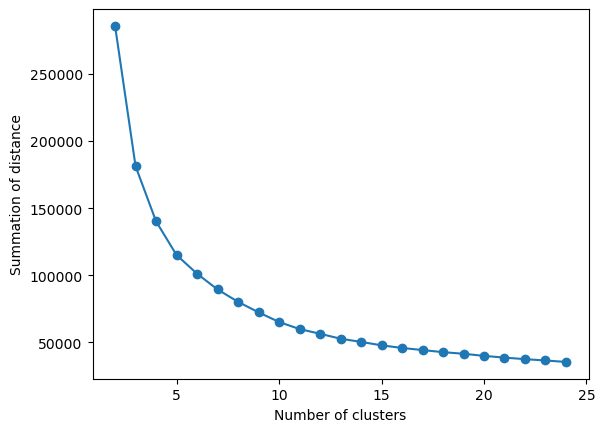

In [30]:
kmeans_dis = list()
for idx in range(2, 25):  
    kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
    kmeans.fit_transform(train_df.iloc[:, 2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,25)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

In [31]:
kmeans = KMeans(init = "k-means++", n_clusters = 8)
kmeans.fit_transform(train_df.iloc[:, 2:])
kmeans_label = kmeans.labels_
score_df["classification"] = kmeans_label
score_df.head(10)

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing,classification
0,female,group B,bachelor's degree,standard,none,72,72,74,3
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,0
5,female,group B,associate's degree,standard,none,71,83,78,0
6,female,group B,some college,standard,completed,88,95,92,2
7,male,group B,some college,free/reduced,none,40,43,39,5
8,male,group D,high school,free/reduced,completed,64,64,67,6
9,female,group B,high school,free/reduced,none,38,60,50,1


In [32]:
class_df = score_df.groupby("classification")[score_df.columns[-4:-1]].mean()
class_df

,math,reading,writing
classification,,,
0,68.531646,78.259494,77.949367
1,47.759124,51.437956,49.043796
2,88.738636,93.318182,93.306818
3,73.294964,68.791367,67.143885
4,82.680272,82.272109,80.891156
5,32.135135,35.972973,33.594595
6,57.973333,67.846667,68.033333
7,60.291667,58.201389,56.500000


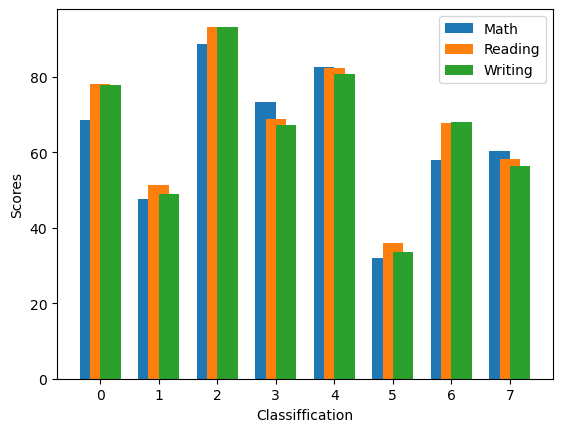

In [33]:
ind = np.arange(8)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.math, width, label='Math')
rects2 = ax.bar(ind, class_df.reading, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.writing, width, label='Writing')

ax.set_xlabel('Classiffication')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

In [34]:
class_df["total_ave_score"] = (class_df.math + class_df.reading + class_df.writing)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Index([2, 4, 0, 3, 6, 7, 1, 5], dtype='int32', name='classification')

In [35]:
rank

classification
2    91.787879
4    81.947846
0    74.913502
3    69.743405
6    64.617778
7    58.331019
1    49.413625
5    33.900901
Name: total_ave_score, dtype: float64

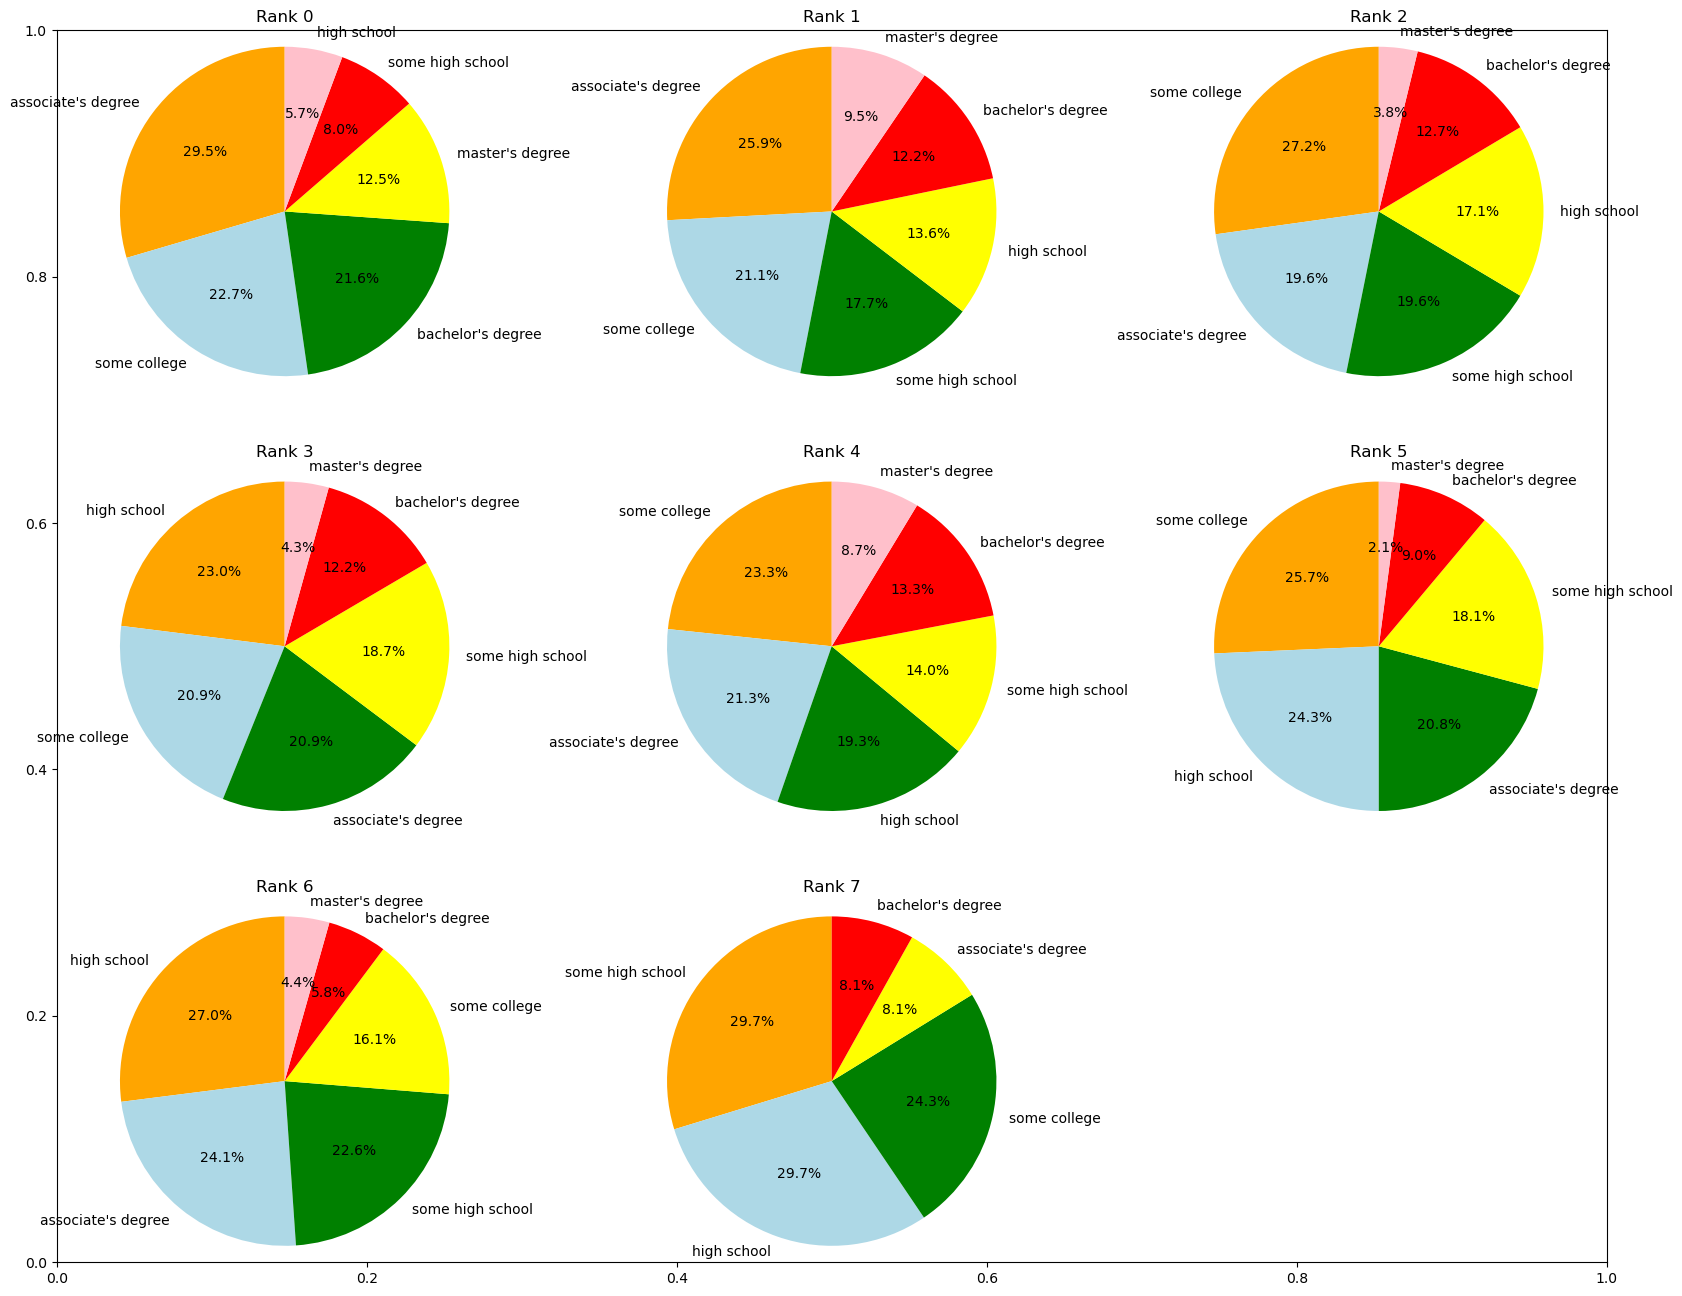

In [36]:
def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["orange","lightblue","green","yellow","red","pink","brown","gray"]
    for idx in range(8):
        plt.subplot(3, 3, idx+1)
        num = "class"+ str(idx)
        num = score_df[score_df["classification"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.show()
plot_pie_chart("parent_education")

In [38]:
#Let's define the high degree of education. Parents having bachelor or master degree are high-level educated. So we focus on these two terms.

#As pie chart were shown above, we can easily understand the ratio of high-degree education. For the rank0, its ratio is around 32%. In addition, there are no differences between rank1 to rank3, and the ratio are around 15~17%. Finally, the ratio is only 8% in rank7.

#We calculated the average score of each rank before, so we can say that parent's education affect the score but not obviously, because there are still 70%~80% parents without high education degree.

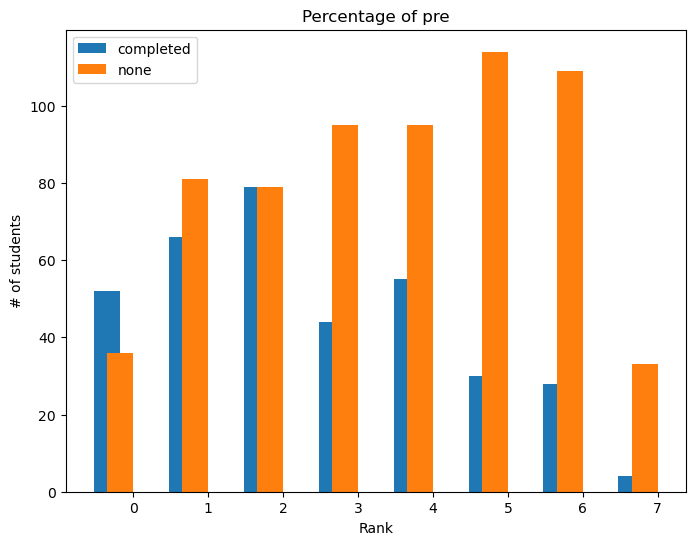

In [39]:
def plot_bar_chart(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(8)
    for idx in range(8):
        num = "class"+ str(idx)
        num = score_df[score_df["classification"]==rank.index[idx]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index()
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
            else:
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
   
    percentage_of_column = score_df[score_df["classification"]==rank.index[4]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+1), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('# of students')
    ax.set_title("Percentage of " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()
    
plot_bar_chart("pre") 
